This notebook is used to check the internal consistency of X-SH for the T6:PDI interface, by comparing the electronic populations averaged over 60 X-SH trajectories with the surface population averaged over the same group of trajectories. The comparison is carried out by calculating the RMSE for each (of the 12) adiabat of the system, and is given in one of my slides, or Carof's 2019 paper on how to calculate the charge mobility.

The electronic and surface populations were calculated with the state-tracking analysis script, and are plotted below. I do not cut off any of the simulation time when I calculate the X-SH surface populations. What this means is that I calculated the surface and electronic adiabat populations by tracking the identites of the adiabats from t = 0, so that (e.g) the electronic population of adiabat 1 at t=0 is compared to the surface population of adiabat 1 at t=0. Since the adiabat populations printed out are energy-ordered and not t=0 ordered, I re-order them wrt t=0 ordering by printing out the state-tracking indices, and using these to swap the adiabats around every timestep, as the state-tracking file just prints out the adiabat indices relative to those in the previous timestep.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NVE_tracked_surface2 = np.array([0.18142335, 0.0972764, 0.13048176, 0.08666678, 0.0948428, 0.10482257,
 0.11176062, 0.10092941, 0.0917963, 0, 0, 0])

internal_consistency_RMSE = np.array([2.07185809e-02, 1.43121939e-02, 1.60423889e-02, 1.43531529e-02,
 1.46815251e-02, 1.44688395e-02, 1.50293565e-02, 1.46551875e-02,
 1.49306327e-02, 5.91153990e-06, 5.92269365e-06, 5.94842442e-06])

#pasted in the surface populations and RMSE's that are printed out by the scripts I ran on archer2

RMSE_vs_surface = internal_consistency_RMSE[:9]/NVE_tracked_surface2[:9]
#calculating RMSE as a fraction of surface population, the RMSE as a fraction should remain relatively constant, at about 0.1 
# of the surface population
adiabats = np.arange(1,13)

The graph below shows the RMSE of the 9 adiabats with non-negligible populations. The RMSE is consistently below 20%, which is comparable (actually smaller) to what Carof et al. got for an ELM pentamer with a similar magnitude of coupling. Generally, the fraction term being smaller is always better, as it means that the RMSE term is smaller relative to the excited-state population. The fraction being large is only a cause for concern for smaller couplings, where the excited-state population is expected to be higher due the smaller energy difference between different adiabats (weaker antibonding contribution of coupling terms), as this means it is probably the abosulte RMSE that is getting bigger.

For large couplings, where the excited-state populations are expected to get smaller, the RMSE as a fraction may be large as well, despite the absolute RMSE being small, just because the excited-state population may be very small, such that relative errors no longer reflect the severity of absolute errors.

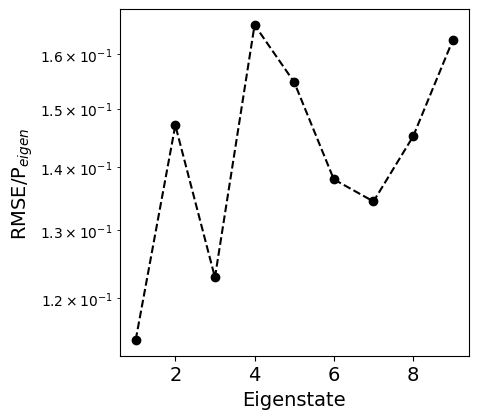

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4.5))

ax.plot(adiabats[:9], RMSE_vs_surface, linestyle = '--', color = 'k')
ax.scatter(adiabats[:9], RMSE_vs_surface, color = 'k')
ax.set_yscale('log')
ax.set_ylabel('RMSE/P$_{eigen}$', fontsize = 14)
ax.set_xlabel('Eigenstate', fontsize = 14)
ax.xaxis.set_tick_params(labelsize = 14)
ax.yaxis.set_tick_params(labelsize = 14)

This plot basically shows the same as the above, but using the explicit RMSE and surface populations. You can clearly see that for all significantly populated adiabats, the RMSE is ~ an order of magnitude smaller. We think this shows that the decoherence correction adequately damps the electronic wavefunction such that it follows the active surface wavefunction, and doesn't intoduce too large of an error into the dynamics.

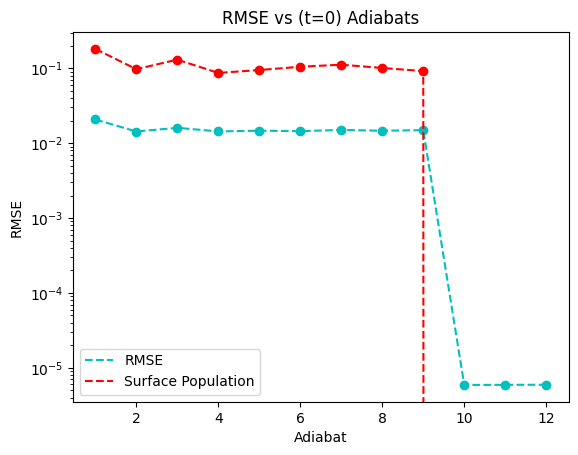

In [ ]:
plt.plot(adiabats, internal_consistency_RMSE, linestyle = '--', color = 'c', label = 'RMSE')
plt.scatter(adiabats, internal_consistency_RMSE, color = 'c')
plt.plot(adiabats, NVE_tracked_surface2, linestyle = '--', color = 'r', label = 'Surface Population')
plt.scatter(adiabats, NVE_tracked_surface2, color = 'r')
plt.yscale('log')
plt.ylabel('RMSE')
plt.xlabel('Adiabat')
plt.title('RMSE vs (t=0) Adiabats')
plt.legend()